### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 29th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

Note for Dr. Taylor: I have run through the cells after completing the homework, and all the plots should come up fine (including the interactive ones). If there are many plot images that come up for the execution of one block, if you re-execute that cell, it should be fine and output the one plot that is relevant for that cell. Maybe this is because I missed a %matplotlib inline or widget somewhere. The last time I went through this notebook before submitting, everything worked fine and I had to double execute one block.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

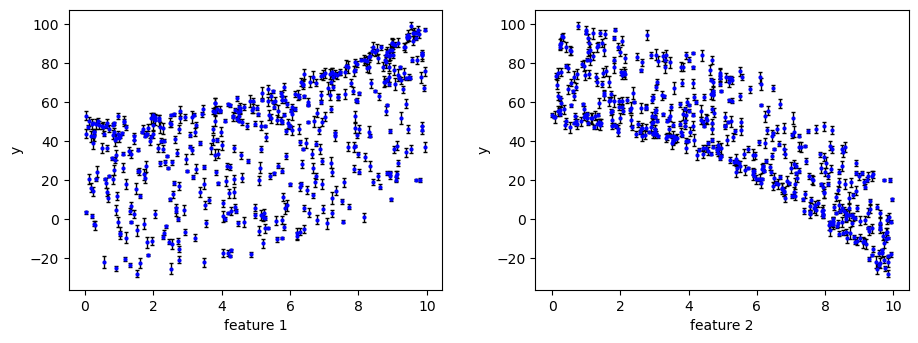

In [86]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

# PROBLEM 1

import numpy as np
import matplotlib.pyplot as plt




filename = "/Users/harvir_d/NEW_repos/astr_8070_s25/coursework/homeworks/hw_data/hw7_data_1.npy" # file path
data = np.load(filename) # easy to load multivariate data if from a numpy file

first_feature = data[:,0] # extracting column at a time
second_feature = data[:,1]
labels=data[:,2]
uncertainties = data[:,3]

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax1 = fig.add_subplot(121) # left hand subplot
ax1.errorbar(first_feature,labels,yerr=uncertainties,fmt='None',ecolor='black',capsize=1.5, capthick=1, elinewidth=1)
ax1.set_xlabel("feature 1")
ax1.set_ylabel("y")

ax1.scatter(first_feature, labels, color='blue', s=4, zorder=3) # zorder puts point markers on top of vertical error bars for better visibility

ax2 = fig.add_subplot(122) 
ax2.errorbar(second_feature,labels,yerr=uncertainties,fmt='None',ecolor='black',capsize=1.5, capthick=1, elinewidth=1)
ax2.set_xlabel("feature 2")
ax2.set_ylabel("y")

ax2.scatter(second_feature, labels, color='blue', s=4, zorder=3) # zorder puts point markers on top of vertical error bars for better visibility


In [87]:
# PROBLEM 2

from astroML.linear_model import LinearRegression

X_design = data[:, :2]  

print(X_design.shape) 

linear_classifier = LinearRegression()

linear_classifier.fit(X_design,labels,uncertainties)

print(linear_classifier.coef_) # print y-intercept and slopes for features 1 and 2 (intercept is the same) 


(500, 2)
[57.10102323  4.94873016 -8.30023407]


SRT: Good, Harvir

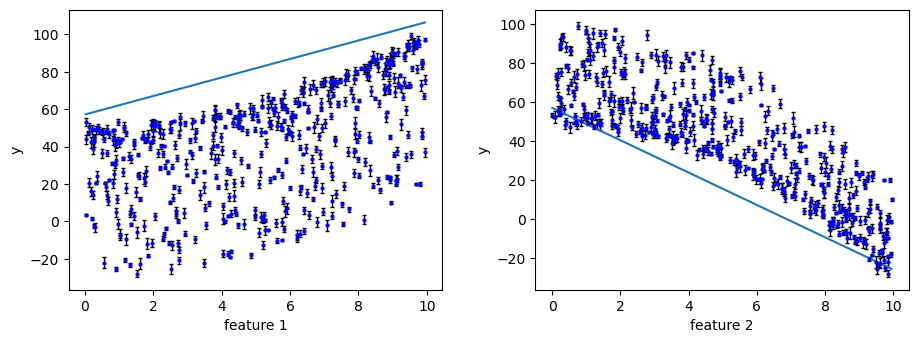

In [88]:
# PROBLEM 2 CONTINUED

%matplotlib inline

Xgrid_feature_one = np.linspace(min(first_feature),max(first_feature),50) # grid for feature one
Xgrid_feature_two = np.linspace(min(second_feature),max(second_feature),50)

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax1 = fig.add_subplot(121) # left hand subplot
ax1.errorbar(first_feature,labels,yerr=uncertainties,fmt='None',ecolor='black',capsize=1.5, capthick=1, elinewidth=1)
ax1.set_xlabel("feature 1")
ax1.set_ylabel("y")

ax1.scatter(first_feature, labels, color='blue', s=4, zorder=3) # zorder puts point markers on top of vertical error bars for better visibility

predict_feature_one = linear_classifier.coef_[0] + Xgrid_feature_one*linear_classifier.coef_[1] # making best fit line with extracted coefficients 

ax1.plot(Xgrid_feature_one,predict_feature_one)

ax2 = fig.add_subplot(122) 
ax2.errorbar(second_feature,labels,yerr=uncertainties,fmt='None',ecolor='black',capsize=1.5, capthick=1, elinewidth=1)
ax2.set_xlabel("feature 2")
ax2.set_ylabel("y")

predict_feature_two = linear_classifier.coef_[0] + Xgrid_feature_two*linear_classifier.coef_[2]

ax2.plot(Xgrid_feature_two,predict_feature_two)

ax2.scatter(second_feature, labels, color='blue', s=4, zorder=3) # zorder puts point markers on top of vertical error bars for better visibility

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

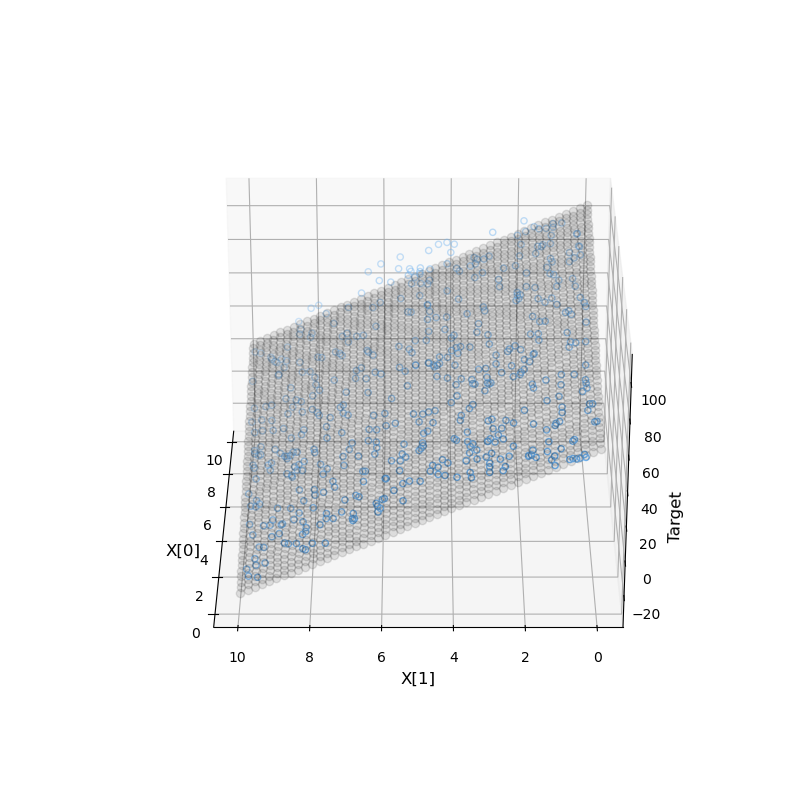

In [89]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib inline
%matplotlib widget

# PROBLEM 3

# Function to update view

from ipywidgets import interactive
 

X_meshgrid = np.vstack(list(map(np.ravel, np.meshgrid(Xgrid_feature_one, Xgrid_feature_two)))).T # 

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

def update_view(angle): # function to change azimuthal angle for interactive viewing
    ax.view_init(elev=28, azim=angle) # other azimuthal angle choices aside from 120 
    plt.draw()

ax.plot(X_meshgrid[:,0], X_meshgrid[:,1], linear_classifier.predict(X_meshgrid), color='k', # this plotting is for the best-fit hyerplane
        zorder=15, linestyle='none', 
        marker='o', alpha=0.1) # adjust alpha value for transparency of plane for better visibility of data points
ax.scatter(first_feature.flatten(), second_feature.flatten(), labels,  # this plotting is for the scatter of data points themselves
           facecolor=(0,0,0,0), s=20,  
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

interactive_plot = interactive(update_view, angle=(0, 360, 5)) # can cycle through rotations of 3d grid
interactive_plot

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [90]:
%matplotlib inline
# PROBLEM 4

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']} # parameters search

K = 5 # Do 5-fold cross validation
grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=K) 
grid.fit(X_design,labels,sample_weight=1/uncertainties**2) # fitting model to data

print(grid.best_params_) # finding best ridge parameters
print(grid.best_score_)

{'alpha': 1.0, 'solver': 'svd'}
0.929182742615996


SRT: Nice

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

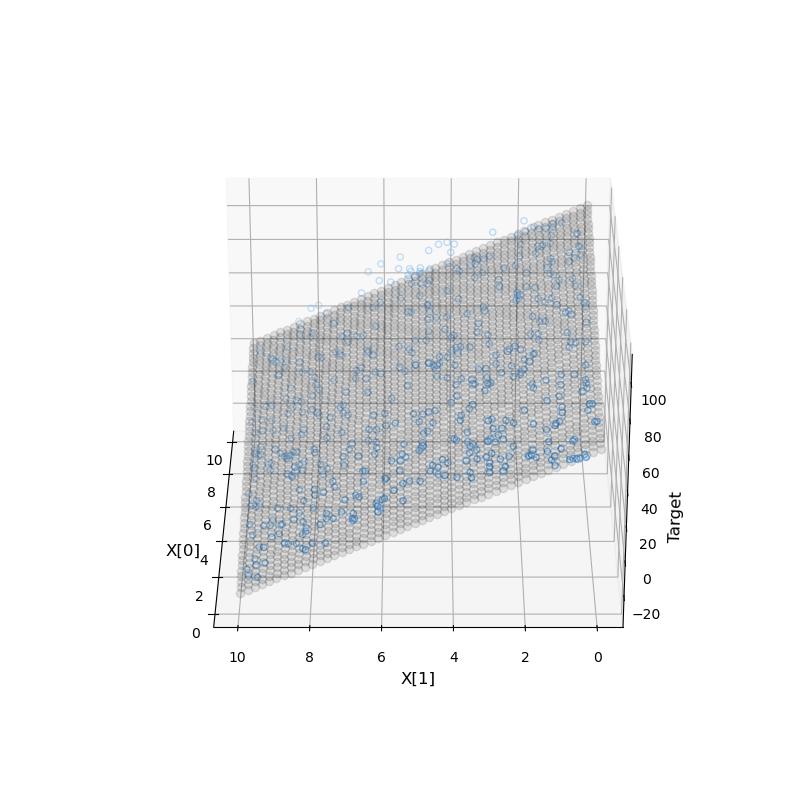

In [91]:

%matplotlib widget 

X_meshgrid = np.vstack(list(map(np.ravel, np.meshgrid(Xgrid_feature_one, Xgrid_feature_two)))).T  

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

def update_view(angle): # function to change azimuthal angle for interactive viewing
    ax.view_init(elev=28, azim=angle) # other azimuthal angle choices aside from 120 
    plt.draw()

ax.plot(X_meshgrid[:,0], X_meshgrid[:,1], grid.predict(X_meshgrid), color='k', # this plotting is for the best-fit hyerplane, now for ridge regression model
        zorder=15, linestyle='none', 
        marker='o', alpha=0.1) # adjust alpha value for transparency of plane for better visibility of data points
ax.scatter(first_feature.flatten(), second_feature.flatten(), labels,  # this plotting is for the scatter of data points themselves
           facecolor=(0,0,0,0), s=20,  
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

interactive_plot = interactive(update_view, angle=(0, 360, 5)) # can cycle through rotations of 3d grid
interactive_plot

In [92]:
%matplotlib inline
# PROBLEM 4 RIDGE CV

from sklearn.linear_model import RidgeCV

ridge_alphas = [0.05, 0.1, 0.2, 0.5, 1.0]

ridge_cv = RidgeCV(alphas=ridge_alphas, store_cv_values=True)
ridge_cv.fit(X_design, labels, sample_weight=1/uncertainties**2)

print(f"Best alpha (RidgeCV): {ridge_cv.alpha_}") # comparing cross-validation techniques

print(f"Best parameters (GridSearchCV): {grid.best_params_}")
print(f"Best score (GridSearchCV): {grid.best_score_}")


Best alpha (RidgeCV): 1.0
Best parameters (GridSearchCV): {'alpha': 1.0, 'solver': 'svd'}
Best score (GridSearchCV): 0.929182742615996


/Users/harvir_d/miniconda3/envs/astr8070/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

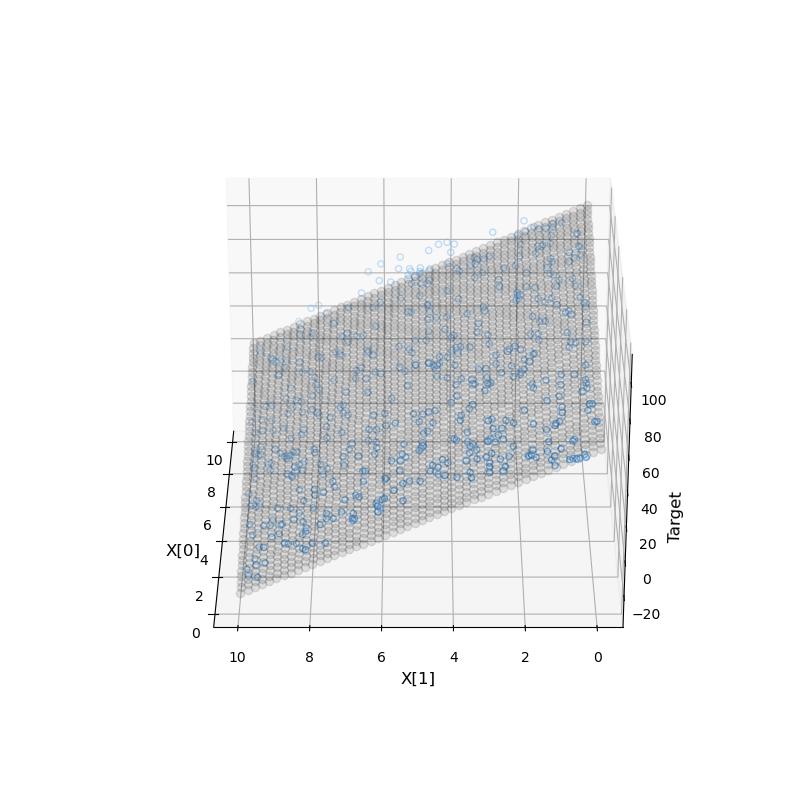

In [93]:
%matplotlib widget 

X_meshgrid = np.vstack(list(map(np.ravel, np.meshgrid(Xgrid_feature_one, Xgrid_feature_two)))).T  

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

def update_view(angle): # function to change azimuthal angle for interactive viewing
    ax.view_init(elev=28, azim=angle) # other azimuthal angle choices aside from 120 
    plt.draw()

ax.plot(X_meshgrid[:,0], X_meshgrid[:,1], ridge_cv.predict(X_meshgrid), color='k', # this plotting is for the best-fit hyerplane, now for ridge regression model
        zorder=15, linestyle='none', 
        marker='o', alpha=0.1) # adjust alpha value for transparency of plane for better visibility of data points
ax.scatter(first_feature.flatten(), second_feature.flatten(), labels,  # this plotting is for the scatter of data points themselves
           facecolor=(0,0,0,0), s=20,  
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

interactive_plot = interactive(update_view, angle=(0, 360, 5)) # can cycle through rotations of 3d grid
interactive_plot

In [94]:
# PROBLEM 5 W/O Uncertainties

from sklearn.gaussian_process import GaussianProcessRegressor, kernels

gp1 = GaussianProcessRegressor(random_state=0, normalize_y=True)
gp1.fit(X_design, labels)


GaussianProcessRegressor(normalize_y=True, random_state=0)

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

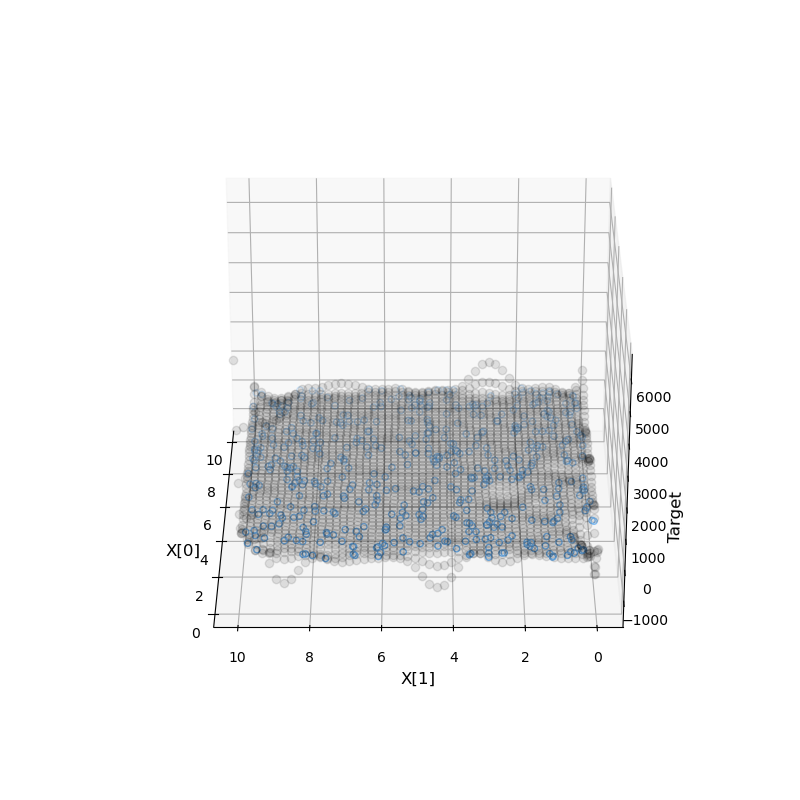

In [95]:
%matplotlib widget 

X_meshgrid = np.vstack(list(map(np.ravel, np.meshgrid(Xgrid_feature_one, Xgrid_feature_two)))).T  

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

def update_view(angle): # function to change azimuthal angle for interactive viewing
    ax.view_init(elev=28, azim=angle) # other azimuthal angle choices aside from 120 
    plt.draw()

ax.plot(X_meshgrid[:,0], X_meshgrid[:,1], gp1.predict(X_meshgrid), color='k', # this plotting is for the best-fit hyerplane, now for ridge regression model
        zorder=15, linestyle='none', 
        marker='o', alpha=0.1) # adjust alpha value for transparency of plane for better visibility of data points
ax.scatter(first_feature.flatten(), second_feature.flatten(), labels,  # this plotting is for the scatter of data points themselves
           facecolor=(0,0,0,0), s=20,  
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

interactive_plot = interactive(update_view, angle=(0, 360, 5)) # can cycle through rotations of 3d grid
interactive_plot

In [96]:
# PROBLEM 5 W/ Uncertainties
%matplotlib inline

gp1 = GaussianProcessRegressor(random_state=0, normalize_y=True,alpha=(uncertainties/labels)**2) # Now we have some relative uncertainties on data points that the GPR accounts for
gp1.fit(X_design, labels)

GaussianProcessRegressor(alpha=array([5.43958419e-04, 3.82759381e-03, 2.60103805e-03, 2.46808730e-03,
       2.65163908e-03, 7.72589348e-04, 1.94817688e-04, 1.67119428e-03,
       6.29160455e-04, 1.53546820e-01, 1.27737611e-03, 4.20743877e-04,
       9.07897153e-04, 1.19348513e-03, 8.23124925e-04, 3.83465716e-04,
       1.52017790e-02, 3.22812075e-04, 3.96160284e+00, 2.98167220e-04,
       4.15652792e-...
       5.38316976e-03, 2.98487981e-03, 7.32974682e-04, 6.94997156e-04,
       5.60561794e-04, 1.10015907e-03, 1.96438887e-03, 5.60292527e-04,
       4.86844042e-04, 3.39426983e-03, 9.75449577e-04, 1.98896826e-03,
       2.24641604e-02, 1.39104618e-03, 2.04290182e-04, 3.06679145e-01,
       7.75266081e-02, 4.07800587e-01, 3.80148249e-03, 1.58631739e-04,
       2.63246735e-03, 2.62188069e-01, 1.18655825e-03, 1.04916023e-02]),
                         normalize_y=True, random_state=0)

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

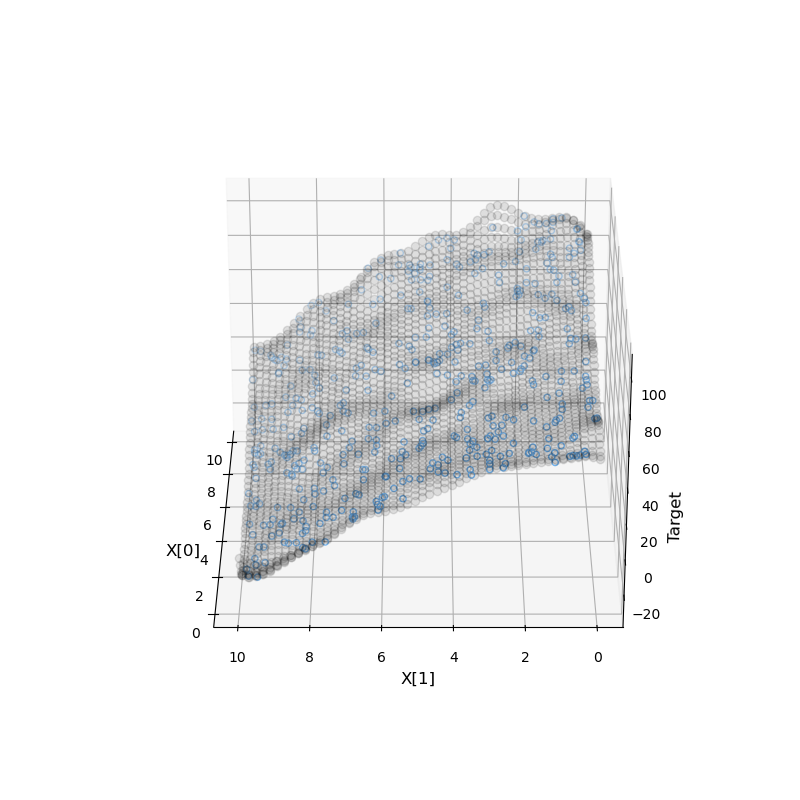

In [97]:
%matplotlib widget 

X_meshgrid = np.vstack(list(map(np.ravel, np.meshgrid(Xgrid_feature_one, Xgrid_feature_two)))).T  

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

def update_view(angle): # function to change azimuthal angle for interactive viewing
    ax.view_init(elev=28, azim=angle) # other azimuthal angle choices aside from 120 
    plt.draw()

ax.plot(X_meshgrid[:,0], X_meshgrid[:,1], gp1.predict(X_meshgrid), color='k', # this plotting is for the best-fit hyerplane, now for ridge regression model
        zorder=15, linestyle='none', 
        marker='o', alpha=0.1) # adjust alpha value for transparency of plane for better visibility of data points
ax.scatter(first_feature.flatten(), second_feature.flatten(), labels,  # this plotting is for the scatter of data points themselves
           facecolor=(0,0,0,0), s=20,  
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

interactive_plot = interactive(update_view, angle=(0, 360, 5)) # can cycle through rotations of 3d grid
interactive_plot

SRT: This is all good, Harvir. But I'm deducting some points because you haven't actually commented on any of your results down to this stage in the problem. I need to see some sentences to show that you can interpret the output of your analyses. -2 points 

In [98]:
%matplotlib inline

from astroML.linear_model import PolynomialRegression

poly_classifier = PolynomialRegression(degree=4)

poly_classifier.fit(X_design,labels,uncertainties) 

print(poly_classifier.coef_) # number of coefficients expected is (f+d) choose d where f is the number of features (2) and d the degree of polynomial fit (4), 15 as expected printed

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842380e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

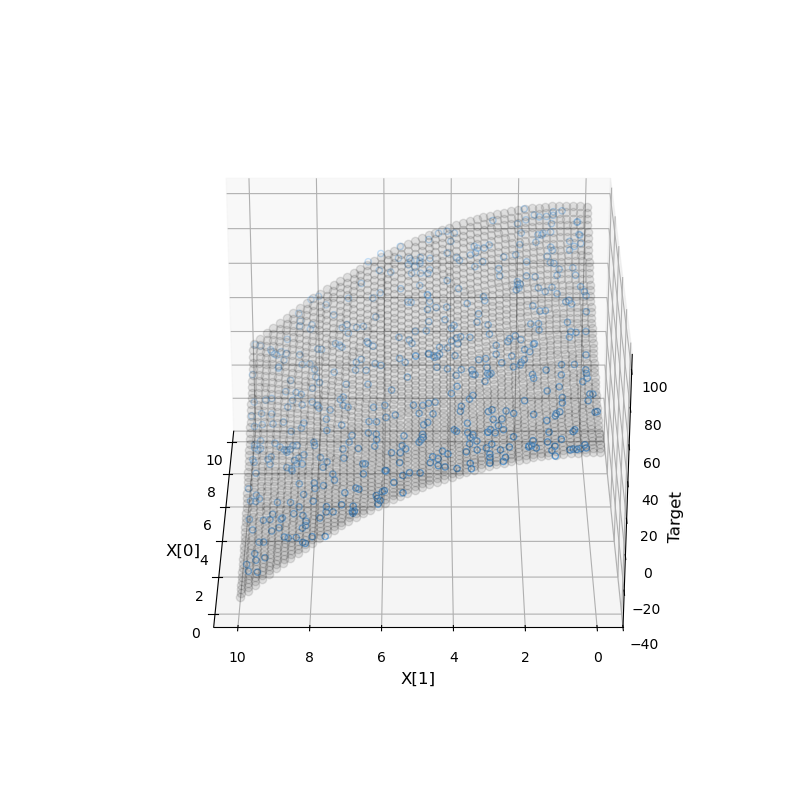

In [99]:
%matplotlib widget 

X_meshgrid = np.vstack(list(map(np.ravel, np.meshgrid(Xgrid_feature_one, Xgrid_feature_two)))).T  

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

def update_view(angle): # function to change azimuthal angle for interactive viewing
    ax.view_init(elev=28, azim=angle) # other azimuthal angle choices aside from 120 
    plt.draw()

ax.plot(X_meshgrid[:,0], X_meshgrid[:,1], poly_classifier.predict(X_meshgrid), color='k', # this plotting is for the best-fit hyerplane, now for ridge regression model
        zorder=15, linestyle='none', 
        marker='o', alpha=0.1) # adjust alpha value for transparency of plane for better visibility of data points
ax.scatter(first_feature.flatten(), second_feature.flatten(), labels,  # this plotting is for the scatter of data points themselves
           facecolor=(0,0,0,0), s=20,  
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

interactive_plot = interactive(update_view, angle=(0, 360, 5)) # can cycle through rotations of 3d grid
interactive_plot

The polynomial fit seems to provide a hyperplane that conforms closer to the data points compared to the linear model, this is expected given more degrees of freedom to tune in the former case. For the GPR, the case without uncertainties appears to overestimate or underestimate quite a few data points, it is inconsistent and rough in that regard. With uncertainties, the fit is tight but continues to not be "smooth."

SRT: OK, good

In [100]:
%matplotlib inline
# PROBLEM 7

from sklearn.model_selection import train_test_split

# Split into 80% training + 20% test
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(
    X_design, labels, uncertainties, test_size=0.2, random_state=42
)

# Split 20% of the training set into a cross-validation set
X_train_final, X_val, y_train_final, y_val, yerr_train_final, yerr_val = train_test_split(
    X_train, y_train, yerr_train, test_size=0.2, random_state=42
)

# Print dataset sizes for verification
print(f"Training set size: {X_train_final.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 320
Validation set size: 80
Test set size: 100


In [101]:

from sklearn.preprocessing import PolynomialFeatures # for expanding feature basis to include higher power terms and cross terms in polynomial fit

degrees = np.arange(1, 11) # degree 1-10
training_err = np.zeros(degrees.shape) # containing rms errors for fit on training data
crossval_err = np.zeros(degrees.shape)

# Number of data points
n_train = len(y_train_final)
n_cv = len(y_val)

# array of BIC values
BIC_train_values = []
BIC_cv_values = []

# Loop over polynomial degrees
for i, d in enumerate(degrees):
    # Generate polynomial features for training and cross-validation sets
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_final)  # Expands features into polynomial basis, cannot do the same np.polyfit as the lecture because we have two features in a multivariate case
    X_cv_poly = poly.transform(X_val)  # Using the same transformation for validation data

    # Solve least squares regression using np.linalg.lstsq
    best_coef, residuals, rank, singular_values = np.linalg.lstsq(X_train_poly, y_train_final, rcond=None) # in place of solving normal equation explicitly y=M\beta, have to unpack all output 
    # but all we need going forward are the best fit coefficients best_coef

    # Compute training error (RMSE) using np.dot()
    y_train_pred = np.dot(X_train_poly, best_coef)  # Matrix multiplication using np.dot y = M\beta
    training_err[i] = np.sqrt(np.mean((y_train_pred - y_train_final) ** 2))

    # Compute cross-validation error (RMSE) using np.dot()
    y_cv_pred = np.dot(X_cv_poly, best_coef)
    crossval_err[i] = np.sqrt(np.mean((y_cv_pred - y_val) ** 2))

    # Number of parameters (k): number of coefficients
    k = len(best_coef)

    
    # Compute BIC
    BIC_train = n_train * training_err[i] + k * np.log(n_train)
    BIC_cv = n_cv * crossval_err[i] + k * np.log(n_cv)

    
    # Store BIC value for this degree
    BIC_train_values.append(BIC_train)
    BIC_cv_values.append(BIC_cv)



SRT: Overall correct procedure, Harvir. But some issues still. While the dot product procedure you used to predict the polynomial solution is fine, you could more easily access the `.predict` attribute after you do `.fit`. Also, you neglected to weight your BIC by any of the data uncertainties, which should be squared and in the denominator of your mean calculation, just like a chi-squared. -3 points.

Text(0, 0.5, 'Cross-Validation RMSE')

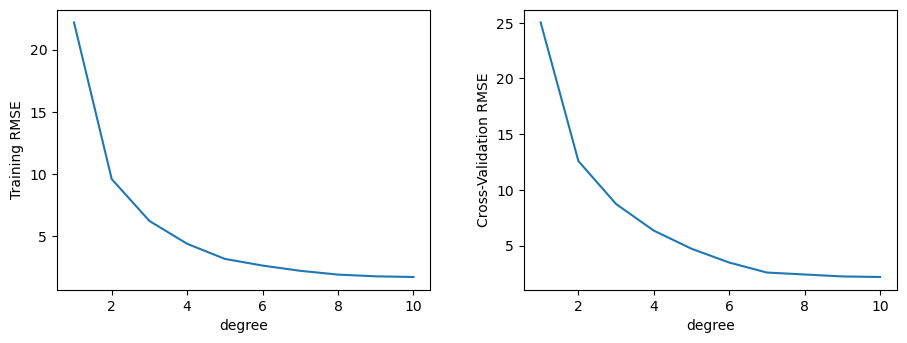

In [103]:
%matplotlib inline

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax1 = fig.add_subplot(121) # left hand subplot
ax1.errorbar(degrees,training_err) # plotting training RMSE
ax1.set_xlabel("degree")
ax1.set_ylabel("Training RMSE")

ax2 = fig.add_subplot(122) 
ax2.errorbar(degrees,crossval_err) # cross-validation RMSE
ax2.set_xlabel("degree")
ax2.set_ylabel("Cross-Validation RMSE")

Text(0, 0.5, 'BIC Cross-Validation')

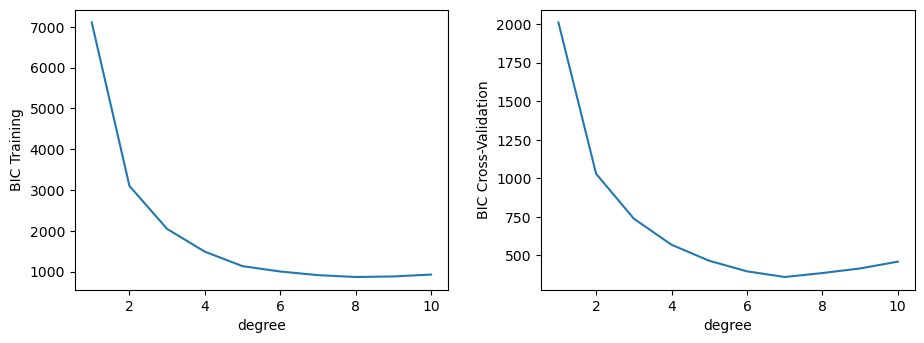

In [104]:
%matplotlib inline

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax1 = fig.add_subplot(121) # left hand subplot
ax1.errorbar(degrees,BIC_train_values) # plotting training RMSE
ax1.set_xlabel("degree")
ax1.set_ylabel("BIC Training")

ax2 = fig.add_subplot(122) 
ax2.errorbar(degrees,BIC_cv_values) # cross-validation RMSE
ax2.set_xlabel("degree")
ax2.set_ylabel("BIC Cross-Validation")

In [105]:

optimal_degree = np.argmin(BIC_cv_values) + 1 # +1 for argmin indexing

# Train the model on the entire training data using the optimal polynomial degree
poly = PolynomialFeatures(degree=optimal_degree, include_bias=True)
X_train_poly = poly.fit_transform(X_train_final)

# Solve for coefficients using least squares
best_coef, residuals, rank, singular_values = np.linalg.lstsq(X_train_poly, y_train_final, rcond=None)

# Predict on the test set
X_test_poly = poly.transform(X_test)  # Transform the test set into polynomial terms
y_test_pred = np.dot(X_test_poly, best_coef)  # Predictions for the test set

# Compute Testing RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

print(f"Optimal Polynomial Degree: {optimal_degree}")
print(f"Test RMSE: {test_rmse}")


Optimal Polynomial Degree: 7
Test RMSE: 2.0632909021619583


SRT: It's actually `2` whenever uncertainties are properly taken into account. I also wonder whether the `dot` procedure is throwing things off too. You should try this again. 

45/50